In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from functions_albert import gini

In [2]:
#display options
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
data = pd.read_excel("UNPS_1112_PS2.xls")

## Exercise 1

In [3]:
# Part a
boolean = data['hhid'].duplicated().any()
# boolean that gives true if there are any repeated hhid values and false otherwise

if boolean == True:
    print("There is at least one duplicate value of hhid.")
else:
    print("All hhid's are unique.")

hhid_column_index = data.columns.get_loc('hhid')
hhid_count = data.count()[hhid_column_index]
print(f"The number of observations in the data set are {hhid_count}, as this is the number of unique household ids.")


All hhid's are unique.
The number of observations in the data set are 2613, as this is the number of unique household ids.


In [4]:
# Part b
interested_variables = ['head_gender', 'head_age', 'familysize', 'consumption', 'income', 'wealth']
data[interested_variables].describe(percentiles=[0.5])

,head_gender,head_age,familysize,consumption,income,wealth
count,"2,597.00","2,597.00","2,597.00","2,613.00","2,613.00","2,613.00"
mean,1.31,46.07,7.48,"1,803.79","1,860.08","4,912.70"
std,0.46,15.07,3.71,"1,308.74","2,607.52","8,359.89"
min,1.00,14.00,1.00,250.31,27.49,0.00
50%,1.00,44.00,7.00,"1,426.61","1,061.19","2,108.60"
max,2.00,100.00,33.00,"8,369.90","52,137.74","76,396.34"


It appears that we have a full data set on data and consumption income and wealth, however we are missing 16 observations about gender, age and family size. There appear to be some outliers espicially at the high end of income, and the minimum of wealth being 0.

In [5]:
# Part c
data['dummy_head_gender'] = 1*(data['head_gender']==2)
women_proportion = data['dummy_head_gender'].mean()

print(f"The proportion of households where the head is female is {round(women_proportion, 3)} or \
{round(women_proportion, 3)*100}%.")

The proportion of households where the head is female is 0.312 or 31.2%.


In [6]:
# Part d
interested_variables = ['consumption', 'familysize', 'head_age', 'dummy_head_gender']

grouped_data = data[interested_variables].groupby(by='dummy_head_gender').mean()
grouped_data.index = grouped_data.index.map({0: 'Male', 1: 'Female'})
grouped_data

,consumption,familysize,head_age
dummy_head_gender,,,
Male,"1,899.39",7.72,44.39
Female,"1,593.26",6.96,49.73


This suggests there is a difference between the head of the household being male or female. Where 0 represents male and 1 represents female. When the head of the household is male the average consumption is greater by 306, which is relatively large compared to the size of the average of consumption. Also the average family size is larger by 0.76 when the head is male, additionally the head age is 5.34 years older when the head is female.  

## Exercise 2

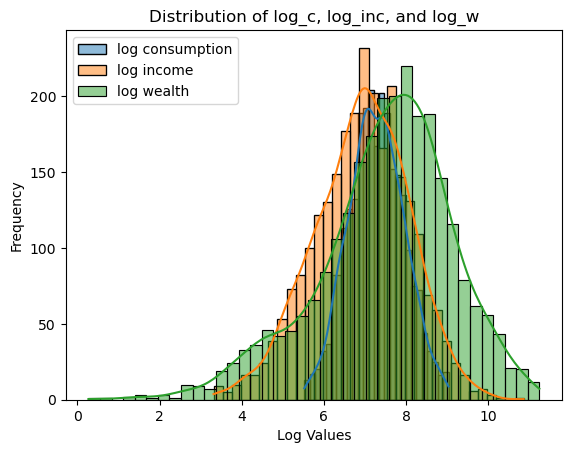

In [7]:
# Part a
# After encounting the error when creating the log of wealth as the min of wealth is 0 we turn it into Nan, additionally
# we change any value of wealth less than 1 into nan as this affects logarithms incorrectly and if it is less than 1 we 
# can determine it is an outlier

data['consumption'] = np.where(data['consumption'] < 1, np.nan, data['consumption'])
data['income'] = np.where(data['income'] < 1, np.nan, data['income'])
data['wealth'] = np.where(data['wealth'] < 1, np.nan, data['wealth'])


data['log_c'] = np.log(data['consumption'])
data['log_inc'] = np.log(data['income'])
data['log_w'] = np.log(data['wealth'])

# Plotting in a histogram
sns.histplot(data['log_c'], kde=True, label='log consumption')
sns.histplot(data['log_inc'], kde=True, label='log income')
sns.histplot(data['log_w'], kde=True, label='log wealth')

plt.title('Distribution of log_c, log_inc, and log_w')
plt.xlabel('Log Values')
plt.ylabel('Frequency')
plt.legend()

plt.show()


The distributions look like they represent standard distributions ranging around log(6) to log(8). Inequality is higher in income, this can be seen as it has more of a left tail and right tail then consumption.

In [8]:
# Part b
# Because we have changed at least one observation in wealth we need to work out the variance ignoring the nan value
variance_log_c = np.var(data['log_c'])
variance_log_inc = np.var(data['log_inc'])
variance_log_w = np.nanvar(data['log_w'])

print(f"For Uganda the variance of log of consumption is {round(variance_log_c, 2)}, the variance of log of income is \
{round(variance_log_inc, 2)} and the variance of log of wealth is {round(variance_log_w, 2)}. However, for the USA the variance\
 of log of consumption is 0.79, the variance of log of income is 0.97 and the variance of log of wealth is 2.11. This means \
 that we suggest there is more inequality in the USA for consumption, however Uganda has higher levels of inequality of income \
 and wealth. Here we have interpreted a large variance of log as leading to greater levels of inequality.")


For Uganda the variance of log of consumption is 0.45, the variance of log of income is 1.34 and the variance of log of wealth is 2.68. However, for the USA the variance of log of consumption is 0.79, the variance of log of income is 0.97 and the variance of log of wealth is 2.11. This means  that we suggest there is more inequality in the USA for consumption, however Uganda has higher levels of inequality of income  and wealth. Here we have interpreted a large variance of log as leading to greater levels of inequality.


In [9]:
# Part c
interested_variables = ['consumption', 'income', 'wealth', 'urban']

grouped_data = data[interested_variables].groupby(by='urban').mean()
grouped_data.index = grouped_data.index.map({0: 'Urban', 1: 'Non-Urban'})
grouped_data

,consumption,income,wealth
urban,,,
Urban,"1,629.45","1,713.96","4,533.86"
Non-Urban,"2,544.22","2,480.62","6,711.02"


From the table we can see that living in an urban area increases consumption, income and wealth by around a third.

In [10]:
# Part d
# Creating an new column that only contains data point of urban so then we can sort by whether the observation is in this column
urban_mask = data['urban'] == 1  

# Calculating variances for urban and non-urban areas separately
variance_urban_log_c = round(data.loc[urban_mask, 'log_c'].var(), 2)
variance_urban_log_inc = round(data.loc[urban_mask, 'log_inc'].var(), 2)
variance_urban_log_w = round(data.loc[urban_mask, 'log_w'].var(), 2)

variance_non_urban_log_c = round(data.loc[~urban_mask, 'log_c'].var(), 2)
variance_non_urban_log_inc = round(data.loc[~urban_mask, 'log_inc'].var(), 2)
variance_non_urban_log_w = round(data.loc[~urban_mask, 'log_w'].var(), 2)

# Print or use the results as needed
print(f"Variance of log consumption for urban areas is {variance_urban_log_c}, the variance of log income for urban areas \
is {variance_urban_log_inc} and the variance of log wealth for urban areas {variance_urban_log_w}.")
print(f"Variance of log consumption for non urban areas is {variance_non_urban_log_c}, the variance of log income for non \
urban areas is {variance_non_urban_log_inc} and the variance of log wealth for non urban areas is {variance_non_urban_log_w}.")


Variance of log consumption for urban areas is 0.44, the variance of log income for urban areas is 1.11 and the variance of log wealth for urban areas 3.92.
Variance of log consumption for non urban areas is 0.41, the variance of log income for non urban areas is 1.34 and the variance of log wealth for non urban areas is 2.39.


In [11]:
# Part e
# We use the gini function which has been imported from the alberts_functions folder

# After having an error of changing the 0 in wealth to nan we convert the nan back to 0
data['wealth'] = np.where(np.isnan(data['wealth']), 1e-5, data['wealth'])

usa_gini_values = [0.41, 0.44, 0.79]
interested_variables = ['consumption', 'income', 'wealth']
for i, variable in enumerate(interested_variables):
    gini_variable = round(gini(data[variable]), 2)
    print(f"The Ugandan Gini variable for {variable} is {gini_variable}, while the USA Gini variable for {variable} is \
{usa_gini_values[i]}.")

The Ugandan Gini variable for consumption is 0.37, while the USA Gini variable for consumption is 0.41.
The Ugandan Gini variable for income is 0.56, while the USA Gini variable for income is 0.44.
The Ugandan Gini variable for wealth is 0.66, while the USA Gini variable for wealth is 0.79.


In [12]:
# Part f

# Calculating the total wealth
total_wealth = data['wealth'].sum()

# Calculate the cumulative percentage of wealth for each percentile
data['wealth_percentile'] = data['wealth'].rank(pct=True)

bottom_50_percent_share = round(data[data['wealth_percentile'] <= 0.5]['wealth'].sum() / total_wealth, 5)
top_10_percent_share = round(data[data['wealth_percentile'] > 0.9]['wealth'].sum() / total_wealth, 5)
top_5_percent_share = round(data[data['wealth_percentile'] > 0.95]['wealth'].sum() / total_wealth, 5)
top_1_percent_share = round(data[data['wealth_percentile'] > 0.99]['wealth'].sum() / total_wealth, 5)

print(f"Share of wealth held by the bottom 50% is {bottom_50_percent_share*100}%.")
print(f"Share of wealth held by the top 10% is {top_10_percent_share*100}%.")
print(f"Share of wealth held by the top 5% is {top_5_percent_share*100}%.")
print(f"Share of wealth held by the top 1% {top_1_percent_share*100}%.")


Share of wealth held by the bottom 50% is 8.211%.
Share of wealth held by the top 10% is 51.105999999999995%.
Share of wealth held by the top 5% is 35.248000000000005%.
Share of wealth held by the top 1% 11.909%.


Part g

From this exercise we can see that the debate on inequality should not only be looked at for rich countries. We have seen that inequality across Uganda is just as an important issue as inequality across the USA.

Part h

The benefits of consumption measures to estimate inequality are:

The negatives of consumption measures to estimate inequality are:

## Exercise 3

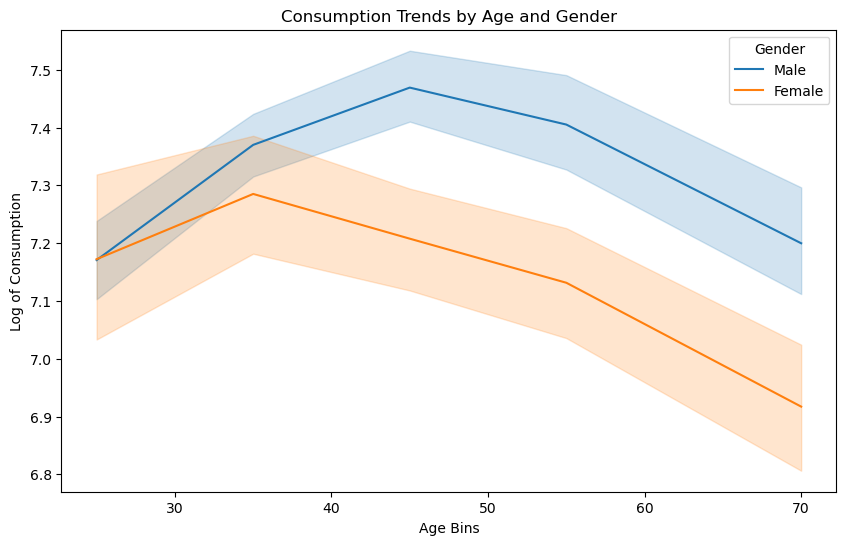

In [13]:
# Part a
# Following the instructions of dropping ages below 18 and above 80 and grouping the ages in bins
data = data[data['head_age'] < 80]
data = data[data['head_age'] >18]

data['Gender'] = np.where(data['head_gender']==2, 'Female', 'Male')

bins = [18, 30, 40, 50, 60, 80]
labels = [25, 35, 45, 55, 70]
data['age_bins'] = pd.cut(data['head_age'],bins=bins, labels=labels)

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='age_bins', y='log_c', hue='Gender', data=data, ax=ax)

ax.set_xlabel('Age Bins')
ax.set_ylabel('Log of Consumption')
ax.set_title('Consumption Trends by Age and Gender')
plt.show()


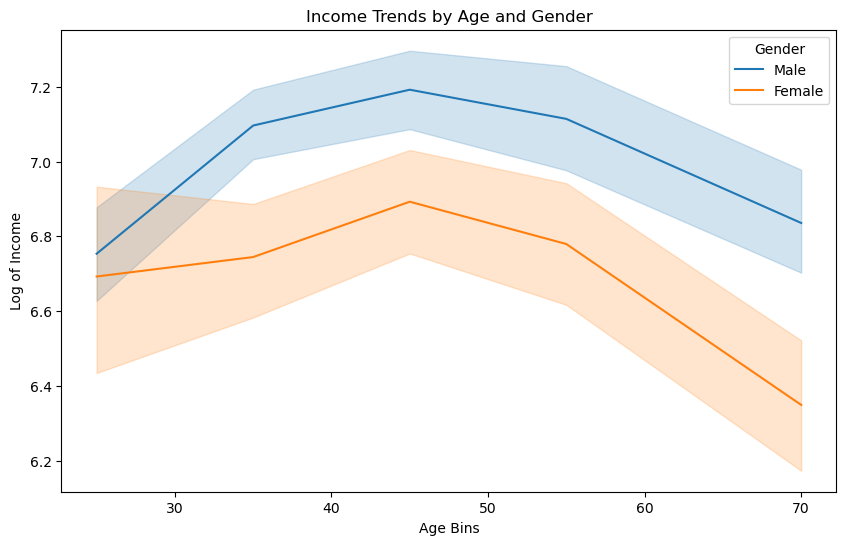

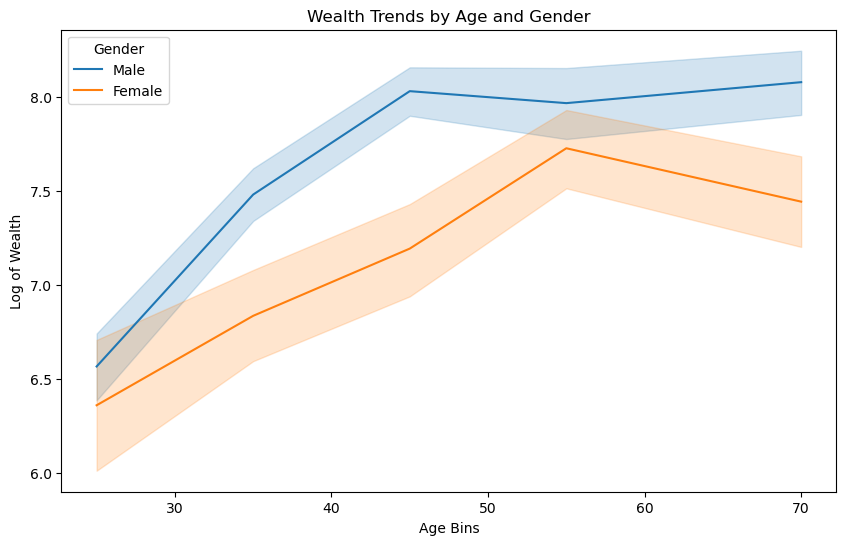

In [14]:
# Part b
# For log income
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='age_bins', y='log_inc', hue='Gender', data=data, ax=ax)

ax.set_xlabel('Age Bins')
ax.set_ylabel('Log of Income')
ax.set_title('Income Trends by Age and Gender')
plt.show()

# For log wealth
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='age_bins', y='log_w', hue='Gender', data=data, ax=ax)

ax.set_xlabel('Age Bins')
ax.set_ylabel('Log of Wealth')
ax.set_title('Wealth Trends by Age and Gender')
plt.show()

In [15]:
# Part c